<a href="https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/ch09_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#최적 군집 수 찾기, 실루엣 점수, 칼린스키-하라바스 지수

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabaz_score, \
    homogeneity_score, completeness_score, adjusted_rand_score
from sklearn.metrics.pairwise import pairwise_distances

In [0]:
# For reproducibility
np.random.seed(1000)


nb_samples = 1000 

In [0]:
# Create dataset
X, _ = make_blobs(n_samples=nb_samples, n_features=2, centers=3, cluster_std=1.5, random_state=1000)

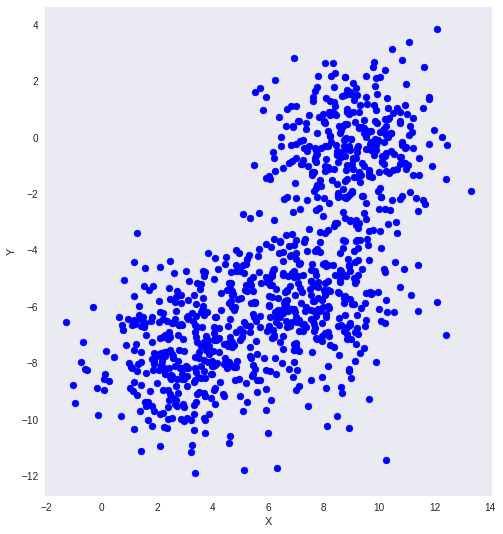

In [35]:
# Show the dataset
fig, ax = plt.subplots(1, 1, figsize=(8, 9))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.scatter(X[:, 0], X[:, 1], marker='o', color='b')

plt.show()

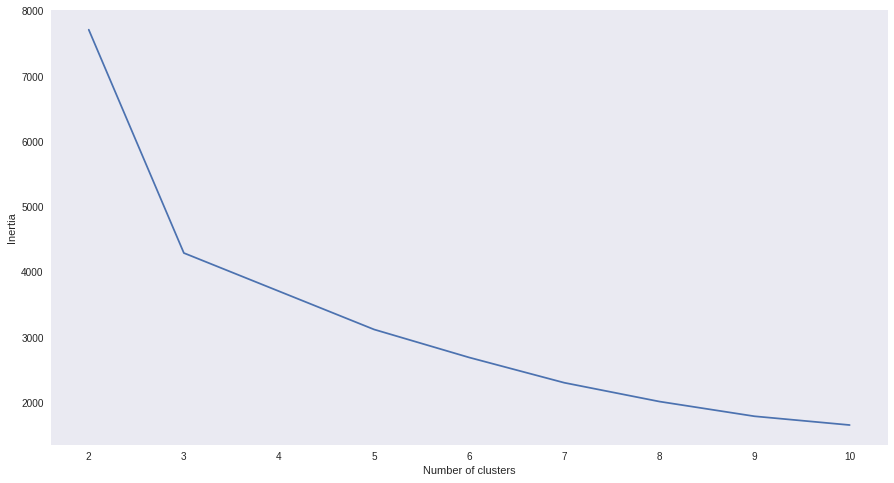

In [36]:
# Analyze the inertia
nb_clusters = [2, 3, 5, 6, 7, 8, 9, 10]

inertias = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    km.fit(X)
    inertias.append(km.inertia_)

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(nb_clusters, inertias)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
ax.grid()

plt.show()

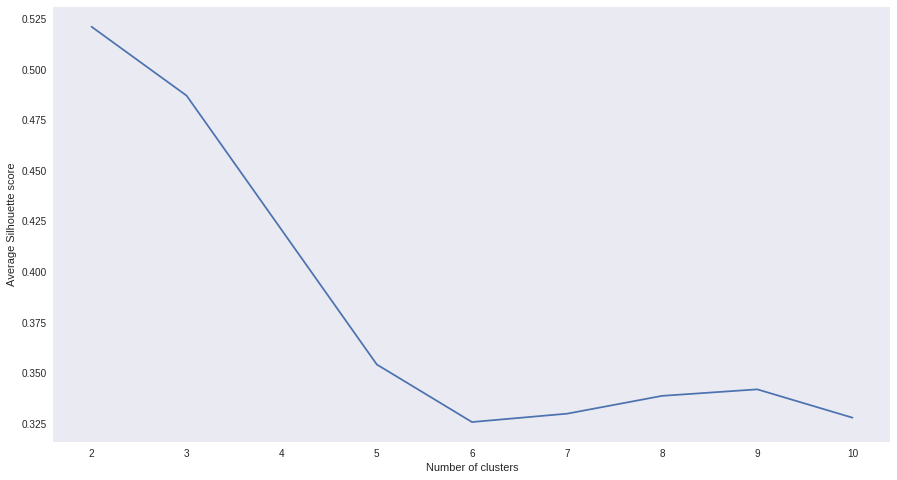

In [37]:
# Analyze the silhouette scores
avg_silhouettes = []

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)
    avg_silhouettes.append(silhouette_score(X, Y))

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(nb_clusters, avg_silhouettes)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Average Silhouette score')
ax.grid()

plt.show()

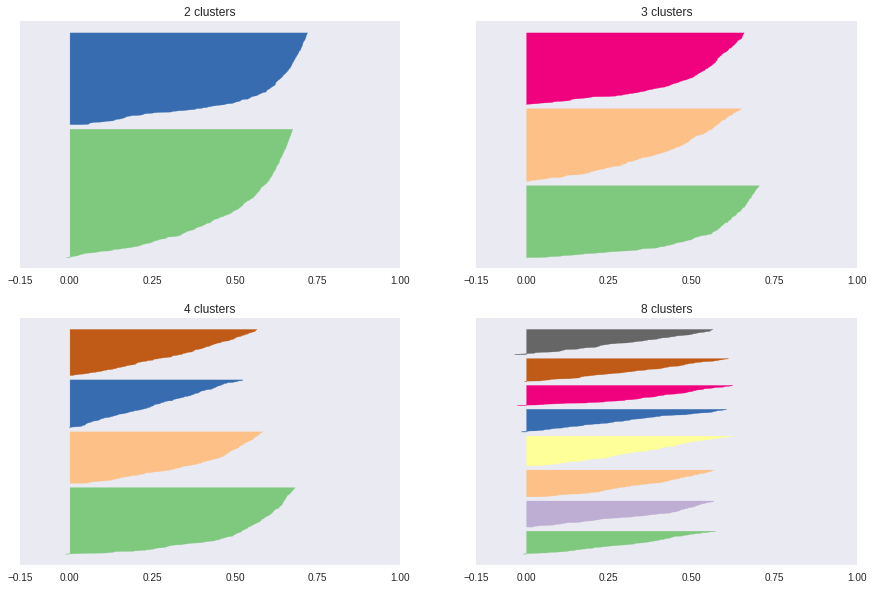

In [38]:
# Draw the silhouette plots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

nb_clusters = [2, 3, 4, 8]
mapping = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i, n in enumerate(nb_clusters):
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)

    silhouette_values = silhouette_samples(X, Y)

    ax[mapping[i]].set_xticks([-0.15, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[mapping[i]].set_yticks([])
    ax[mapping[i]].set_title('%d clusters' % n)
    ax[mapping[i]].set_xlim([-0.15, 1])
    ax[mapping[i]].grid()
    y_lower = 20

    for t in range(n):
        ct_values = silhouette_values[Y == t]
        ct_values.sort()

        y_upper = y_lower + ct_values.shape[0]

        color = cm.Accent(float(t) / n)
        ax[mapping[i]].fill_betweenx(np.arange(y_lower, y_upper), 0,
                                     ct_values, facecolor=color, edgecolor=color)

        y_lower = y_upper + 20

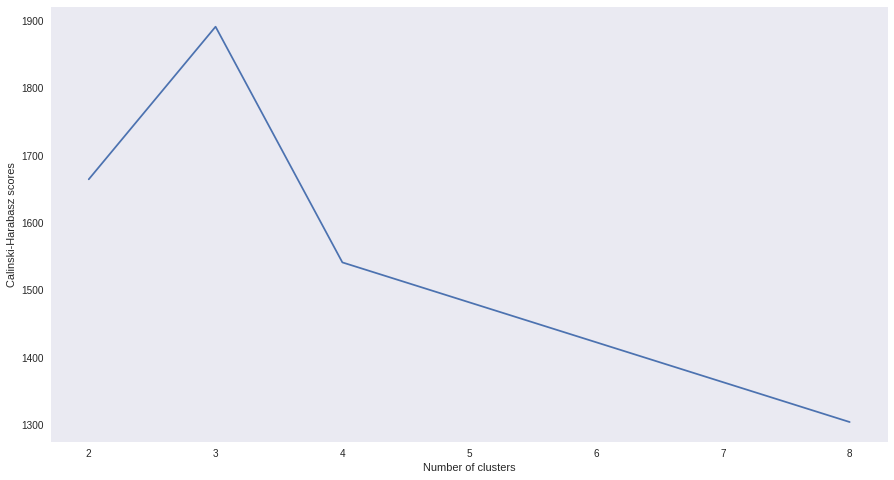

In [39]:
# Analyze the Calinski-Harabasz scores
ch_scores = []

km = KMeans(n_clusters=n)
Y = km.fit_predict(X)

for n in nb_clusters:
    km = KMeans(n_clusters=n)
    Y = km.fit_predict(X)
    ch_scores.append(calinski_harabaz_score(X, Y))

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(nb_clusters, ch_scores)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Calinski-Harabasz scores')
ax.grid()

plt.show()

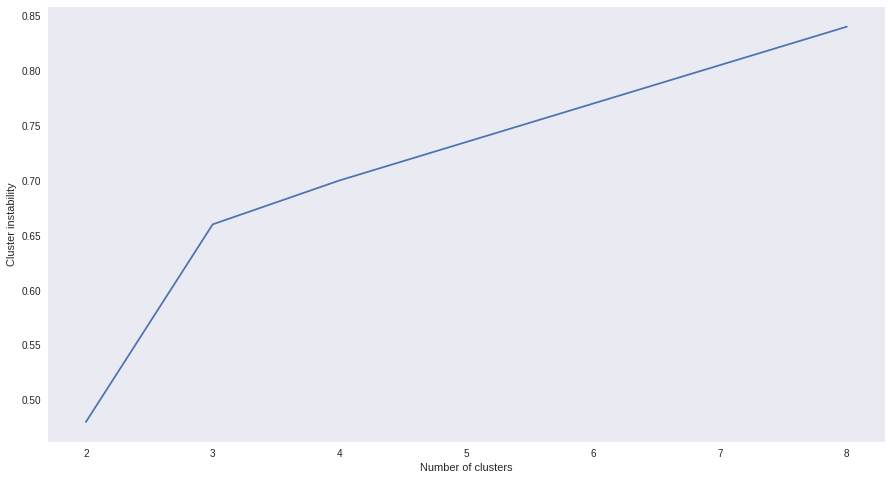

In [40]:
# Analyze the cluster instability
nb_noisy_datasets = 10

X_noise = []

for _ in range(nb_noisy_datasets):
    Xn = np.ndarray(shape=(1000, 2))

    for i, x in enumerate(X):
        if np.random.uniform(0, 1) < 0.25:
            Xn[i] = X[i] + np.random.uniform(-2.0, 2.0)
        else:
            Xn[i] = X[i]

    X_noise.append(Xn)

instabilities = []

for n in nb_clusters:
    Yn = []

    for Xn in X_noise:
        km = KMeans(n_clusters=n)
        Yn.append(km.fit_predict(Xn))

    distances = []

    for i in range(len(Yn) - 1):
        for j in range(i, len(Yn)):
            d = pairwise_distances(Yn[i].reshape(-1, 1), Yn[j].reshape(-1, 1), 'hamming')
            distances.append(d[0, 0])

    instability = (2.0 * np.sum(distances)) / float(nb_noisy_datasets ** 2)
    instabilities.append(instability)

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(nb_clusters, instabilities)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Cluster instability')
ax.grid()

plt.show()

In [41]:
# Analyze the homegeneity, completeness, and Adjusted Rand score
km = KMeans(n_clusters=3)
Yp = km.fit_predict(X)

print('Homegeneity: %.3f' % homogeneity_score(Y, Yp))
print('Completeness: %.3f' % completeness_score(Y, Yp))
print('Adjusted Rand score: %.3f' % adjusted_rand_score(Y, Yp))


Homegeneity: 0.446
Completeness: 0.842
Adjusted Rand score: 0.374
